<a href="https://colab.research.google.com/github/soumyanamboo/Machine-Learning-Techniques/blob/main/GD_MBGD_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression:

The steps to be followed are:
1.   Import Libraries
2.   Generate training data
3.  Preprocessing: Dummy feature addition and train test split
4.  Model Inference
5.  Loss Calculation
6.  Optimization

## **1. Import Libraries**

In [ ]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.   Generate training data

In [ ]:
def generate_data(n):
  
  w = np.random.rand(2,)
  X = 10 * np.random.rand(n,)

  y = w[0] + w[1] * X + np.random.randn(n,)  # to add some random noice to the label value

  return(X, y, w)

In [ ]:

X, y, w = generate_data(100)
print(X.shape, y.shape, w.shape)

(100,) (100,) (2,)


## 3.  Preprocessing: Dummy feature addition and train test split

In [ ]:
def add_dummy_feature(x):
  '''   Adds dummy feature to the dataset.

        Args:
          x : Training dataset
        Returns:
          Training dataset with addition of dummy feature.
  '''
  dummy_feature_matrix = np.column_stack((np.ones(x.shape[0]),x))
  return(dummy_feature_matrix)

In [ ]:
from sklearn.model_selection import train_test_split
def preprocess(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=42)
  X_train_with_dummy = add_dummy_feature(X_train)
  y_train_with_dummy = add_dummy_feature(y_train)

  X_test_with_dummy = add_dummy_feature(X_test)
  y_test_with_dummy = add_dummy_feature(y_test)

  return X_train_with_dummy, y_train, X_test_with_dummy, y_test

In [ ]:
X_train, y_train, X_test, y_test = preprocess(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 2) (80,) (20, 2) (20,)


## 4.  Model Inference

In [ ]:
def predict(X, w):
  ''' Prediction of output label for a given input

      Args:
        X: feature matrix of shape (n,m+1)
        w: weight vector of shape(m+1, 1)
      Returns:
        y: predicted label vector of shape (n,1)
  '''
  # checking feature matrix and weight vector have compatible shape
  assert X.shape[-1] == w.shape[0], "X and w dont have compatible dimensions"
  return X @ w

## 5.  Loss Calculation

In [ ]:
def loss(X, y, w):
  ''' Calculating loss of a model
      Args:
        X: feature matrix of shape (n,m+1)
        y: label vector of shape (n,)
        w: weight vector of shape (m+1,1)
      Returns:
        Loss
  '''
  e = predict(X, w) - y
  L = (1/2) * (np.transpose(e) @ e)
  return(L)

## 6.  Optimization

### 1. Using Normal Equation:

In [ ]:
def normal_equation(X, y):
  ''' Estimate the parameters of linear regression model with normal quation.

      Args:
        X: feature meatrix of given inputs
        y: label vector

      Returns:
        Weight vector
  '''
  w1 = np.linalg.pinv(X) @ y
  return w1

### 2.  Gradient Descent

In [ ]:
def calculate_gradient(X, y ,w):
  ''' Calculates gradient of loss function w.r.t weight vector on training set

      Args:
        X: feature matrix of shape (n,m+1)
        y: label vector of shape (n,)
        w: weight vector of shape (m+1,1)
      Returns:
        A vector of gradients
  '''
  gradient = np.transpose(X) @ (predict(X,w) - y)
  return gradient

In [ ]:
def update_weights(w, grad, lr):
  ''' updates the weights based on the gradient of the loss function
      w_new = w_old - (lr * grad)
      Args:
        w: old weight vector
        grad: gradient of loss w.r.t w
        lr: learning rate
      Return:
        updated weight vector
  '''
  w_new = w - (lr * grad)
  return w_new

In [ ]:
def gradient_descent(X:np.ndarray, y:np.ndarray,lr:float, num_epochs:int):
  ''' Estimate parameters of linear regression model through gradient descent

      Args:
        X: Feature Matrix
        y: label vector
        lr: learning rate
        num_epochs: number of training steps
      
      Return:
      weight vector: final weight vector
      Error vector across all iterations
      weight vector across all iterations
  '''
  w_all = []    # weight vector across all iterations
  err_all = []  # error vector across all iterations

  # parameter vector initialized to zeroes
  w = np.zeros(X_train.shape[-1])

  # Gradient descent loop
  print()
  for i in np.arange(0, num_epochs):
    w_all.append(w)

    #calculate error due to the current weight vector using loss function
    err_all.append(loss(X_train, y_train,w))

    #gradient calculation
    dJdw = calculate_gradient(X_train, y_train, w)

    #Print status every 100 iterations
    if(i%100 == 0):
      print('Iteration #: %d, loss: %4.2f'%(i, err_all[-1]))
    
    #weight vector update
    w = update_weights(w,dJdw,lr)
  
  return w, err_all, w_all

In [ ]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel("iteration #")
  plt.ylabel("Loss $J(\mathbf{w})$")


Iteration #: 0, loss: 1355.85
Iteration #: 100, loss: 30.80
Iteration #: 200, loss: 29.91
Iteration #: 300, loss: 29.31
Iteration #: 400, loss: 28.90
Iteration #: 500, loss: 28.62
Iteration #: 600, loss: 28.43
Iteration #: 700, loss: 28.31
Iteration #: 800, loss: 28.22
Iteration #: 900, loss: 28.16
Iteration #: 1000, loss: 28.12
Iteration #: 1100, loss: 28.10
Iteration #: 1200, loss: 28.08
Iteration #: 1300, loss: 28.07
Iteration #: 1400, loss: 28.06
Iteration #: 1500, loss: 28.05
Iteration #: 1600, loss: 28.05
Iteration #: 1700, loss: 28.04
Iteration #: 1800, loss: 28.04
Iteration #: 1900, loss: 28.04


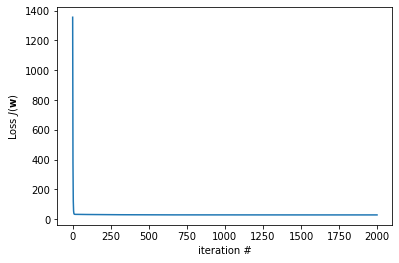

In [ ]:
w_gd, err_all, w_all = gradient_descent(X_train, y_train, lr=0.0001, num_epochs=2000)
plot_learning_curves(err_all)

[0.76872424 0.86039115]


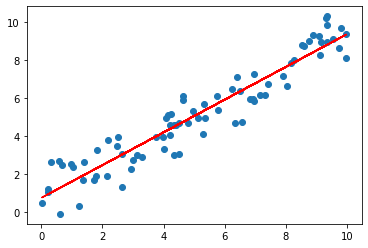

In [ ]:
print(w_gd)
plt.figure()
plt.scatter(X_train[:,1], y_train)
plt.plot(X_train[:,1], X_train@w_gd,'r')
plt.show()

### MiniBatch Gradient Descent (MGBGD)

In [ ]:
t0, t1 = 200, 100000
def learning_schedule(t):
  return (t0 / (t + t1))

In [ ]:
def mini_batch_gd(X:np.ndarray, y:np.ndarray, num_iters:int, minibatch_size:int):
  ''' Estimates paramaters of linear regression through mini batch gradient descent

      Args:
        X : feature matrix
        y : label vector
        num_iters : number of iterations
        minibatch_size : batch size
      
      Returns:
        weight vector
        error vector of all iterations
        weight vector of all iterations
  '''
  w_all = []  # weight vector of all iterations
  err_all = [] # loss vector of all iterations

  #weight vector(parameter vector) initialized to [0,0]
  w = np.zeros((X.shape[1]))
  t = 0

  for epoch in range(num_iters):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0,X.shape[0],minibatch_size):
      t += 1
      xi = X_shuffled[i:i+minibatch_size]
      yi = y_shuffled[i:i+minibatch_size]
      err_all.append(loss(xi, yi, w))

      gradients = 2/minibatch_size * calculate_gradient(xi, yi, w)
      lr = learning_schedule(t)
      w = update_weights(w, gradients,lr)
      w_all.append(w)

  return w, err_all, w_all

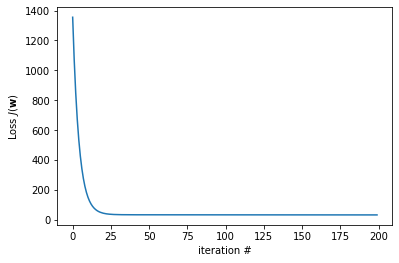

In [ ]:
w_mbgd, err_all, w_all = mini_batch_gd(X_train, y_train, 200, 100)
plot_learning_curves(err_all)

[0.23316799 0.93955461]


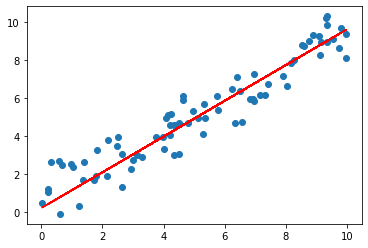

In [ ]:
print(w_mbgd)
plt.figure()
plt.scatter(X_train[:,1], y_train)
plt.plot(X_train[:,1], X_train@w_mbgd,'r')
plt.show()

### 4. Stocastic Gradient Descent (SGD)

In [ ]:
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
  ''' Estimates paramaters of linear regression through mini batch gradient descent

      Args:
        X : feature matrix
        y : label vector
        num_epochs : number of iterations
        
      Returns:
        weight vector
        error vector of all iterations
        weight vector of all iterations
  '''
  w_all = []  # weight vector of all iterations
  err_all = [] # loss vector of all iterations

  #weight vector(parameter vector) initialized to [0,0]
  w = np.zeros((X.shape[1]))

  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      err_all.append(loss(xi, yi, w))

      gradients = 2 * calculate_gradient(xi, yi, w)
      lr = learning_schedule(epoch * X.shape[0]+i)
      w = update_weights(w, gradients,lr)
      w_all.append(w)

  return w, err_all, w_all

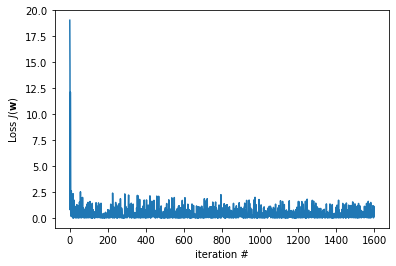

In [ ]:
w_sgd, err_all, w_all = sgd(X_train, y_train, 20)
plot_learning_curves(err_all)

[0.72722751 0.9060435 ]


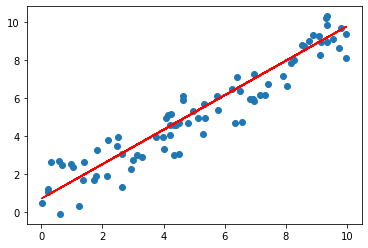

In [ ]:
print(w_sgd)
plt.figure()
plt.scatter(X_train[:,1], y_train)
plt.plot(X_train[:,1], X_train@w_sgd,'r')
plt.show()

Comparison of GD, MBGD and SGD

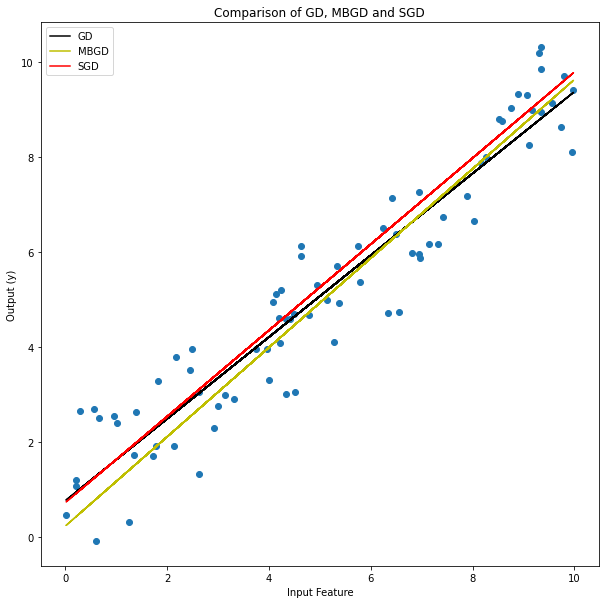

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,1], y_train)
plt.plot(X_train[:,1], X_train@w_gd,'black')
plt.plot(X_train[:,1], X_train@w_mbgd,'y')
plt.plot(X_train[:,1], X_train@w_sgd,'r')
plt.legend(["GD", "MBGD", "SGD"])
plt.xlabel("Input Feature")
plt.ylabel("Output (y)")
plt.title("Comparison of GD, MBGD and SGD")
plt.show()